# Analysis for Continuous Improvement

Author Name: Tim Schroeder

9-digit PID: tjschroeder23

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should have post-exercise questions and a debrief so we can learn from each other's mistakes which would be particularly helpful for first time programmers with no other programming language knowledge.
2. 
3. 
4. 
5. 

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze:

2. Suggestion for how to collect data to support this idea in the future: 

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data:

2. This idea is more valuable than the others brainstormed because: 


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [1]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [2]:
from data_utils import read_csv_rows, column_values, columnar, head, concat, count, select, choice_order, slice_count
from tabulate import tabulate


Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [3]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)
print(f"Data File Read: {SURVEY_DATA_CSV_FILE_PATH}")
print(f"{len(data_rows)} rows")

data_cols: dict[str, list[str]] = columnar(data_rows)
print(f"{len(data_cols.keys())} columns")
print(f"Columns names: {data_cols.keys()}")


Data File Read: ../../data/survey.csv
620 rows
35 columns
Columns names: dict_keys(['row', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'ap_principles', 'ap_a', 'other_comp', 'prior_time', 'languages', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'flipped_class', 'no_hybrid', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


In [4]:
selected_data: dict[str, list[str]] = select(data_cols, ["hours_online_social", 
"sync_perf", "all_sync", "difficulty", "understanding"])

In [5]:
hrs_soc_cnts: dict[str, int] = choice_order(["None", "0 to 2 hours", "3 to 5 hours", "5 to 10 hours", "10+ hours"], 
count(selected_data["hours_online_social"]))
print(f"hrs_soc_counts: {hrs_soc_cnts}")

understanding_cnts: dict[str, int] = choice_order(["1", "2", "3", "4", "5", "6", "7"], 
count(selected_data["understanding"]))
print(f"understanding_counts: {understanding_cnts}")

slices: dict[str, dict[str, int]] = slice_count(["None", "0 to 2 hours", "3 to 5 hours", "5 to 10 hours", "10+ hours"],
["1", "2", "3", "4", "5", "6", "7"], selected_data["hours_online_social"], selected_data["understanding"])

hrs_soc_counts: {'None': 1, '0 to 2 hours': 116, '3 to 5 hours': 327, '5 to 10 hours': 143, '10+ hours': 33}
understanding_counts: {'1': 14, '2': 28, '3': 68, '4': 82, '5': 172, '6': 182, '7': 74}


In [6]:

tabulate(head(selected_data, 10), selected_data.keys(), "html")


hours_online_social,sync_perf,all_sync,difficulty,understanding
3 to 5 hours,2,2,1,7
0 to 2 hours,3,3,6,3
3 to 5 hours,3,4,4,6
3 to 5 hours,5,4,4,5
0 to 2 hours,3,3,5,5
10+ hours,2,2,3,6
3 to 5 hours,3,3,4,6
5 to 10 hours,2,2,4,7
0 to 2 hours,5,4,4,6
3 to 5 hours,2,2,4,6


<BarContainer object of 7 artists>

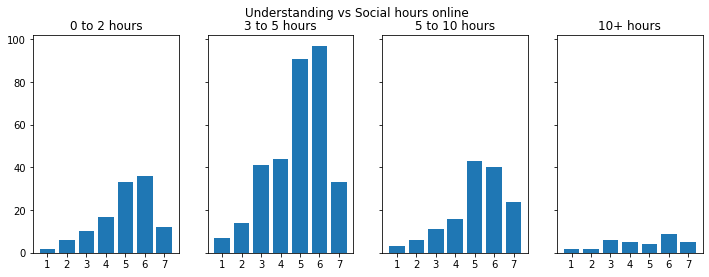

In [9]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
fig.suptitle("Understanding vs Social hours online")

axes[0].set_title("0 to 2 hours")
axes[0].bar(slices["0 to 2 hours"].keys(), slices["0 to 2 hours"].values())

axes[1].set_title("3 to 5 hours")
axes[1].bar(slices["3 to 5 hours"].keys(), slices["3 to 5 hours"].values())

axes[2].set_title("5 to 10 hours")
axes[2].bar(slices["5 to 10 hours"].keys(), slices["5 to 10 hours"].values())

axes[3].set_title("10+ hours")
axes[3].bar(slices["10+ hours"].keys(), slices["10+ hours"].values())


## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion

